<a href="https://colab.research.google.com/github/ngriggs/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Stretch%20goal%20for%20join%20and%20merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Okay time to completely rework the stretch goal

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-07-31 02:55:44--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  42.5MB/s    in 5.0s    

2019-07-31 02:55:55 (39.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
import pandas as pd
products = pd.read_csv('products.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
order_products = pd.concat([order_products__prior, order_products__train])
orders = pd.read_csv('orders.csv')

In [0]:
df = (products[['product_id', 'product_name']]
      .merge(order_products[['product_id', 'order_id', 'add_to_cart_order']])
      .merge(orders[['order_id', 'order_hour_of_day']]))
print(df.shape)
df.head()

(33819106, 5)


,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,7,11
1,769,Sliced American Cheese,1107,10,11
2,6184,Clementines,1107,14,11
3,8048,Packaged Grape Tomatoes,1107,15,11
4,9007,Frosted Flakes,1107,17,11


In [0]:
test = df.groupby('product_name').agg({'order_id': 'count',
                               'order_hour_of_day': 'mean'})

In [0]:
test.columns = ['count', 'mean_hour']
test = test.reset_index()
test = test[test['count']>2900]
test.head()

,product_name,count,mean_hour
14,0% Fat Free Organic Milk,4006,13.233899
22,0% Greek Strained Yogurt,13651,12.298806
32,1 Liter,4278,13.696120
46,1% Low Fat Milk,8933,13.377029
50,1% Lowfat Milk,14692,13.285121


In [0]:
early_list = test['mean_hour'].sort_values(ascending=True)[:25].keys().tolist()
late_list = test['mean_hour'].sort_values(ascending=False)[:25].keys().tolist()

early_products = test.loc[early_list, 'product_name'].tolist()
late_products = test.loc[late_list, 'product_name'].tolist()

In [0]:
early = df[df['product_name'].isin(early_products)]
late = df[df['product_name'].isin(late_products)]
early.head()

,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day
2,6184,Clementines,1107,14,11
16,46149,Zero Calorie Cola,1107,6,11
37,6184,Clementines,9273,25,15
45,12427,Original Beef Jerky,9273,3,15
61,38928,0% Greek Strained Yogurt,9273,1,15


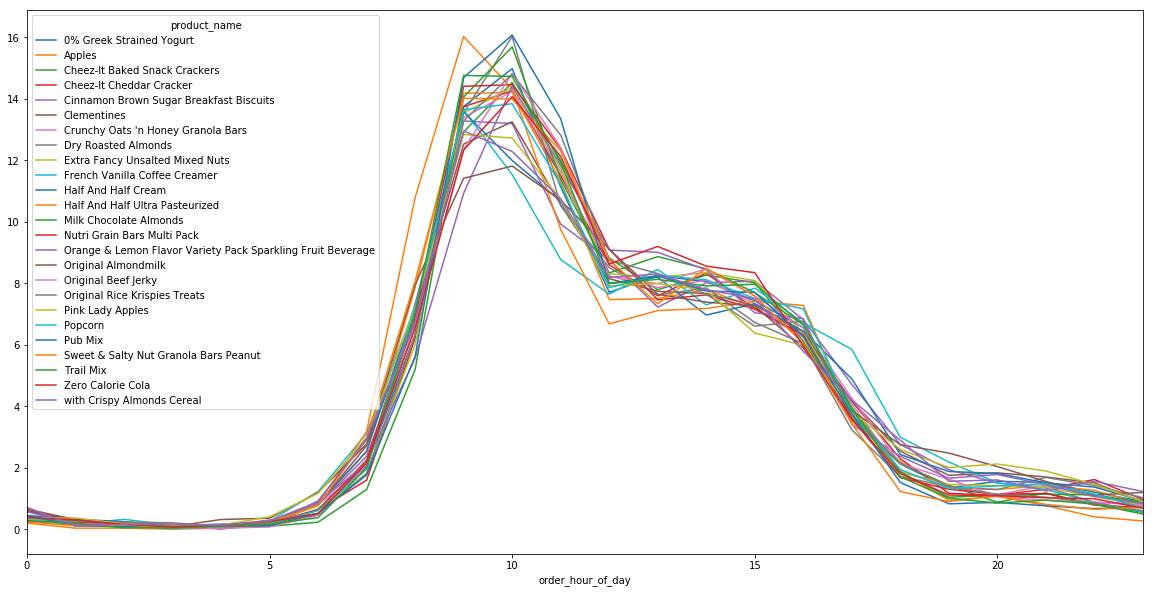

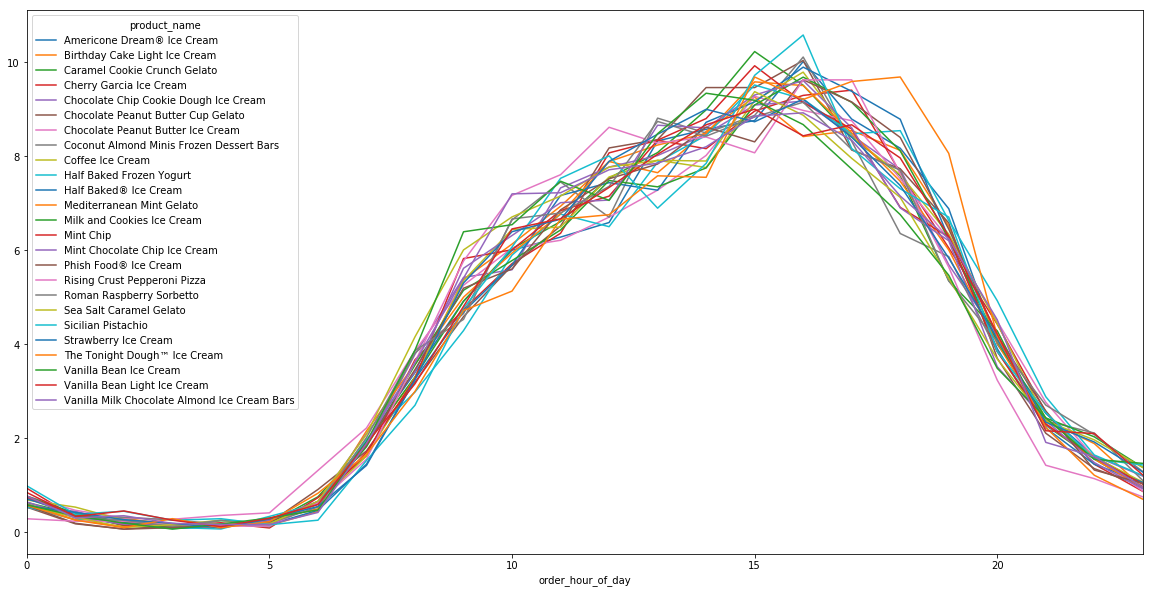

In [0]:
early_plot = (pd.crosstab(index = early['order_hour_of_day'], columns = early['product_name'], normalize='columns')*100).plot(figsize=(20,10));
late_plot = (pd.crosstab(index = late['order_hour_of_day'], columns = late['product_name'], normalize='columns')*100).plot(figsize=(20,10));

In [0]:
early_plot = pd.crosstab(index = early['order_hour_of_day'], columns = early['product_name'], normalize='columns')*100
late_plot = pd.crosstab(index = late['order_hour_of_day'], columns = late['product_name'], normalize='columns')*100

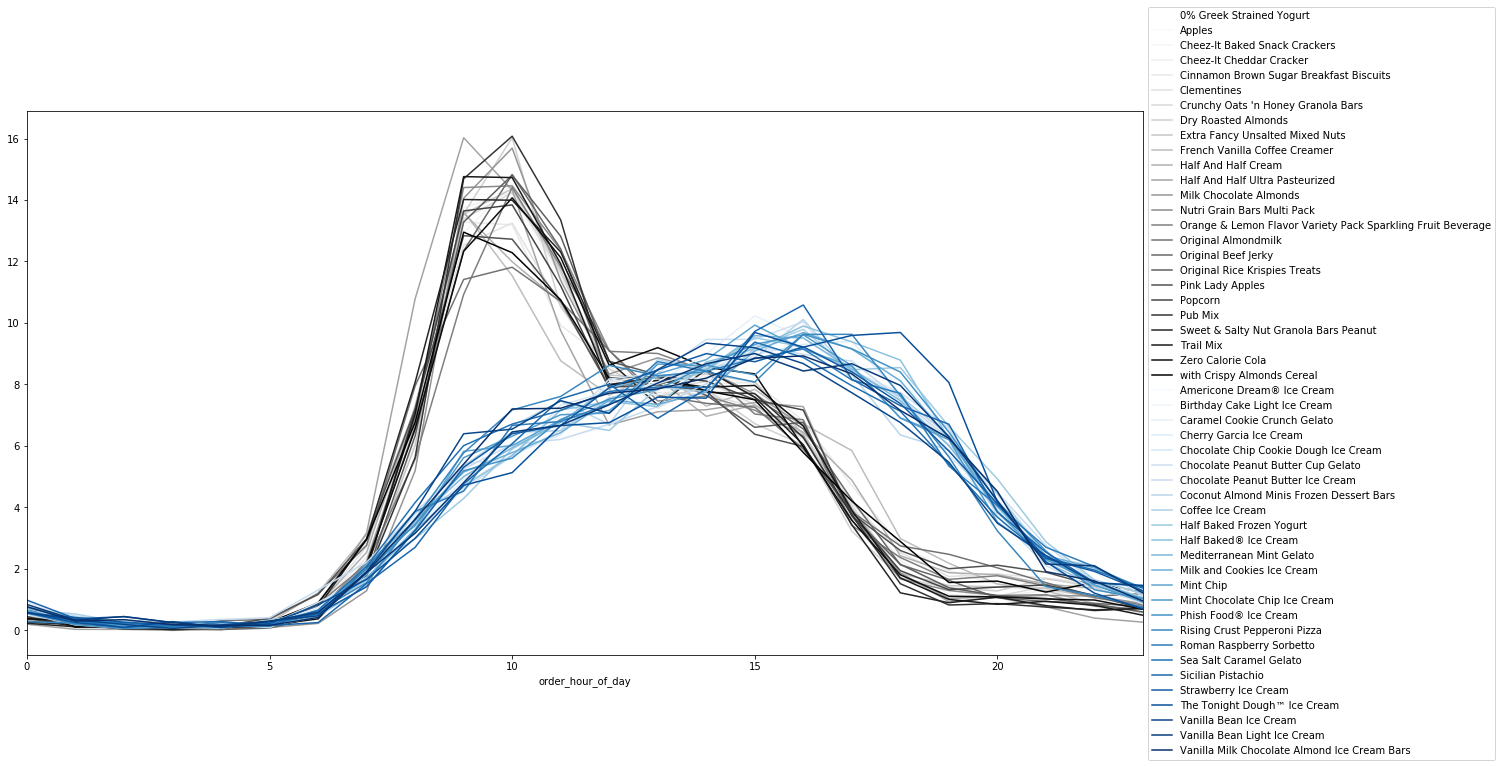

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
early_plot.plot(ax=ax, colormap='Greys')
late_plot.plot(ax=ax, colormap='Blues')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Let's Take a look at Plotnine

In [0]:
#matplotlib inline
import plotnine as p9

In [0]:
import pandas as pd

In [4]:
suverys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

FileNotFoundError: ignored